In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv(r'C:\Users\S Siva Raman\Downloads\archive (1)\mobile_sales.csv')

In [8]:
df.head()

,TransactionID,Date,MobileModel,Brand,Price,UnitsSold,TotalRevenue,CustomerAge,CustomerGender,Location,PaymentMethod
0,79397f68-61ed-4ea8-bcb2-f918d4e6c05b,2024-01-06,direction,Green Inc,1196.95,85,28002.80,32,Female,Port Erik,Online
1,4f87d114-f522-4ead-93e3-f336402df6aa,2024-04-05,right,Thomas-Thompson,1010.34,64,2378.82,55,Female,East Linda,Credit Card
2,6750b7d6-dcc5-48c5-a76a-b6fc9d540fe1,2024-02-13,summer,Sanchez-Williams,400.80,95,31322.56,57,Male,East Angelicastad,Online
3,7da7de95-f772-4cc2-bce0-b0873f98233e,2024-04-17,keep,Greer and Sons,338.60,79,31159.75,46,Other,East Kevin,Cash
4,469044af-0d60-4d87-af66-c6603e844057,2024-06-02,option,Brown and Sons,839.79,41,11523.36,38,Male,New Lindaborough,Online


In [9]:
df.shape

(1000, 11)

In [13]:
# show df info
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:5]])
desc_df = pd.DataFrame(data=list_item, columns='Feature,df Type,Null, Null (%),Unique,Unique Sample'.split(","))
desc_df

,Feature,df Type,Null,Null (%),Unique,Unique Sample
0,TransactionID,object,0,0.0,1000,"[79397f68-61ed-4ea8-bcb2-f918d4e6c05b, 4f87d11..."
1,Date,object,0,0.0,205,"[2024-01-06, 2024-04-05, 2024-02-13, 2024-04-1..."
2,MobileModel,object,0,0.0,637,"[direction, right, summer, keep, option]"
3,Brand,object,0,0.0,980,"[Green Inc, Thomas-Thompson, Sanchez-Williams,..."
4,Price,float64,0,0.0,999,"[1196.95, 1010.34, 400.8, 338.6, 839.79]"
5,UnitsSold,int64,0,0.0,99,"[85, 64, 95, 79, 41]"
6,TotalRevenue,float64,0,0.0,999,"[28002.8, 2378.82, 31322.56, 31159.75, 11523.36]"
7,CustomerAge,int64,0,0.0,47,"[32, 55, 57, 46, 38]"
8,CustomerGender,object,0,0.0,3,"[Female, Male, Other]"
9,Location,object,0,0.0,963,"[Port Erik, East Linda, East Angelicastad, Eas..."


Missing Values: There are no missing values in the dataset, which means the data is complete and does not require imputation or removal of rows due to missing data.

In [15]:
df.duplicated().sum()

0

# Statistics About the Dataset

In [16]:
df.describe()

,Price,UnitsSold,TotalRevenue,CustomerAge
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,807.512970,50.074000,40218.445040,41.141000
std,402.489878,28.616804,32715.290358,13.528346
min,103.320000,1.000000,116.850000,18.000000
25%,458.037500,25.000000,13316.037500,29.000000
50%,823.730000,51.000000,30860.655000,41.000000
75%,1157.875000,75.000000,60770.435000,53.000000
max,1499.250000,99.000000,141411.840000,64.000000


### Feature Engineering

We have to Change data type of the date column as you can see above information

In [20]:
df['Date']=pd.to_datetime(df['Date'])

In [22]:
# Date Features
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

In [23]:
# 2. Revenue Per Unit
df['RevenuePerUnit'] = df['TotalRevenue'] / df['UnitsSold']

In [24]:
# 3. Customer Age Groups
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64']
df['AgeGroup'] = pd.cut(df['CustomerAge'], bins=bins, labels=labels, right=False)

In [25]:
# 5. Creating a combined feature for Location and Payment Method
df['LocationPayment'] = df['Location'] + '_' + df['PaymentMethod']

In [26]:
df.head()

,TransactionID,Date,MobileModel,Brand,Price,UnitsSold,TotalRevenue,CustomerAge,CustomerGender,Location,PaymentMethod,Month,DayOfWeek,IsWeekend,RevenuePerUnit,AgeGroup,LocationPayment
0,79397f68-61ed-4ea8-bcb2-f918d4e6c05b,2024-01-06,direction,Green Inc,1196.95,85,28002.80,32,Female,Port Erik,Online,1,5,1,329.444706,25-34,Port Erik_Online
1,4f87d114-f522-4ead-93e3-f336402df6aa,2024-04-05,right,Thomas-Thompson,1010.34,64,2378.82,55,Female,East Linda,Credit Card,4,4,0,37.169063,55-64,East Linda_Credit Card
2,6750b7d6-dcc5-48c5-a76a-b6fc9d540fe1,2024-02-13,summer,Sanchez-Williams,400.80,95,31322.56,57,Male,East Angelicastad,Online,2,1,0,329.711158,55-64,East Angelicastad_Online
3,7da7de95-f772-4cc2-bce0-b0873f98233e,2024-04-17,keep,Greer and Sons,338.60,79,31159.75,46,Other,East Kevin,Cash,4,2,0,394.427215,45-54,East Kevin_Cash
4,469044af-0d60-4d87-af66-c6603e844057,2024-06-02,option,Brown and Sons,839.79,41,11523.36,38,Male,New Lindaborough,Online,6,6,1,281.057561,35-44,New Lindaborough_Online


### Data Validation

In [27]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).sum()
outliers

Price               0
UnitsSold           0
TotalRevenue        6
CustomerAge         0
IsWeekend           0
RevenuePerUnit    102
dtype: int64

As you can see in the above columns TotalRevenue has 6 outliers and RevenuePerUnit has 102 outliers 

In [28]:
# Define the capping thresholds
Q1_total_revenue = df['TotalRevenue'].quantile(0.25)
Q3_total_revenue = df['TotalRevenue'].quantile(0.75)
IQR_total_revenue = Q3_total_revenue - Q1_total_revenue
lower_bound_total_revenue = Q1_total_revenue - 1.5 * IQR_total_revenue
upper_bound_total_revenue = Q3_total_revenue + 1.5 * IQR_total_revenue

Q1_revenue_per_unit = df['RevenuePerUnit'].quantile(0.25)
Q3_revenue_per_unit = df['RevenuePerUnit'].quantile(0.75)
IQR_revenue_per_unit = Q3_revenue_per_unit - Q1_revenue_per_unit
lower_bound_revenue_per_unit = Q1_revenue_per_unit - 1.5 * IQR_revenue_per_unit
upper_bound_revenue_per_unit = Q3_revenue_per_unit + 1.5 * IQR_revenue_per_unit

# Capping the outliers
df['TotalRevenue'] = df['TotalRevenue'].clip(lower=lower_bound_total_revenue, upper=upper_bound_total_revenue)
df['RevenuePerUnit'] = df['RevenuePerUnit'].clip(lower=lower_bound_revenue_per_unit, upper=upper_bound_revenue_per_unit)

# Verify that the outliers have been addressed
outliers_after_capping = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).sum()
outliers_after_capping

Price             0
UnitsSold         0
TotalRevenue      0
CustomerAge       0
IsWeekend         0
RevenuePerUnit    0
dtype: int64

Now outliers are addressed and removed this is also a method to detect outliers and remove them
and the method is called as Interquartile Range (IQR)

## Revenue Maximization

#### Total Revenue by Top 10 Mobile models

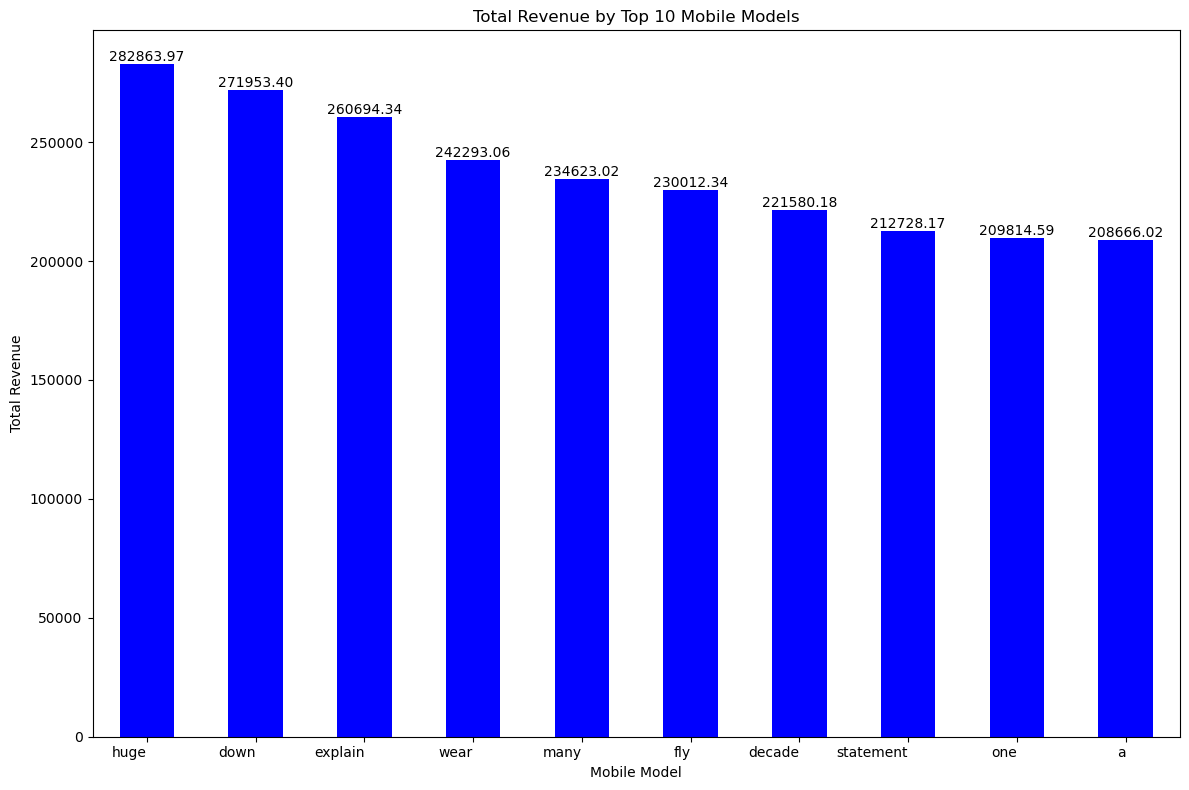

In [38]:
plt.figure(figsize=(12, 8))
top_10_models = df.groupby('MobileModel')['TotalRevenue'].sum().sort_values(ascending=False).head(10)
top_10_models.plot(kind='bar', color='blue')
plt.title('Total Revenue by Top 10 Mobile Models')
plt.xlabel('Mobile Model')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0,ha='right')

for index, value in enumerate(top_10_models):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


#### Total Revenue by Top 10 Brands

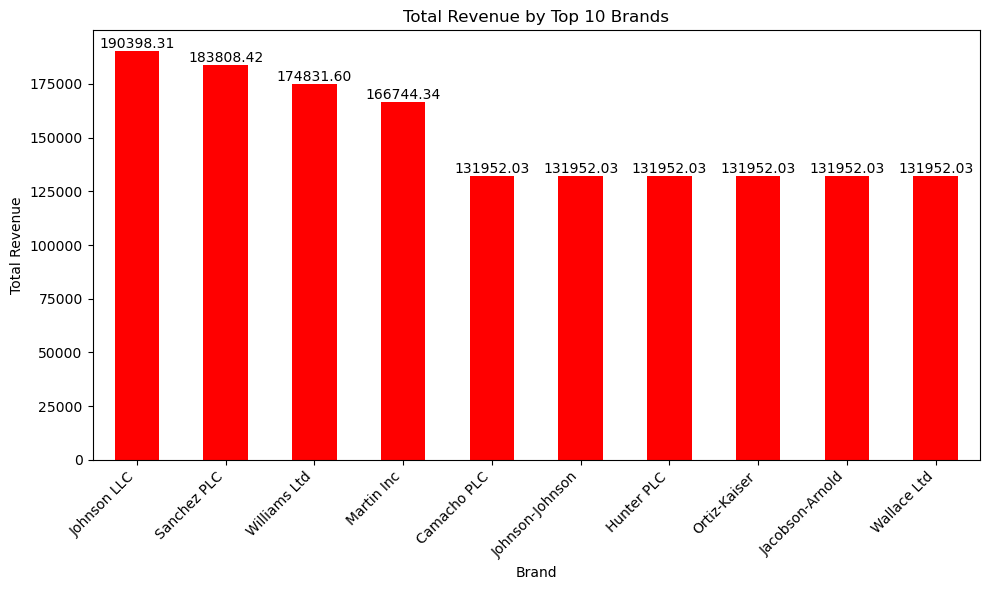

In [43]:
plt.figure(figsize=(10, 6))
top_10_brands = df.groupby('Brand')['TotalRevenue'].sum().sort_values(ascending=False).head(10)
top_10_brands.plot(kind='bar', color='red')
plt.title('Total Revenue by Top 10 Brands')
plt.xlabel('Brand')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')

# Adding data labels
for index, value in enumerate(top_10_brands):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


#### Total Revenue by Top 10 Locations

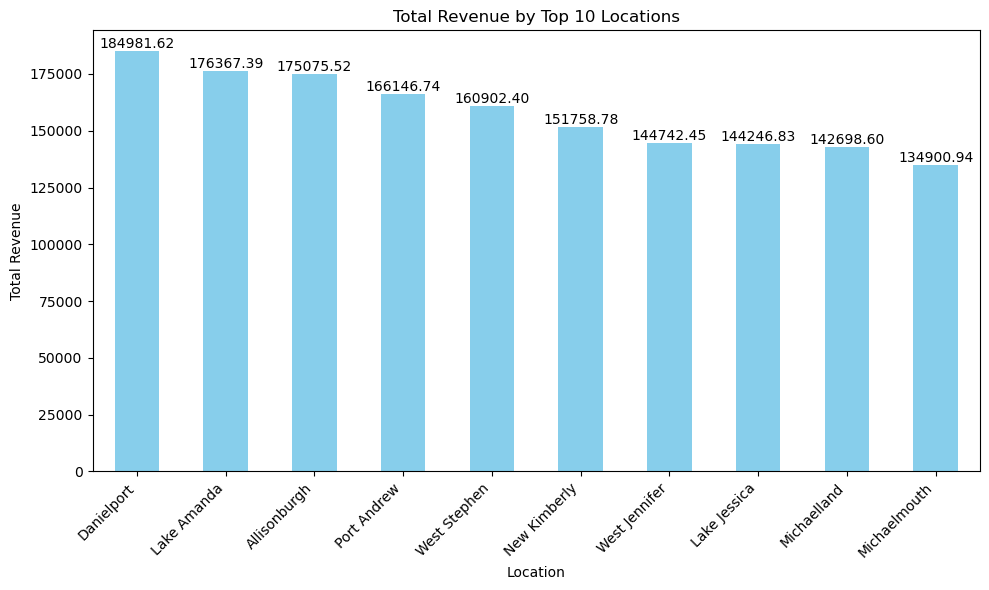

In [41]:
plt.figure(figsize=(10, 6))
top_10_locations = df.groupby('Location')['TotalRevenue'].sum().sort_values(ascending=False).head(10)
top_10_locations.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Top 10 Locations')
plt.xlabel('Location')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')

# Adding data labels
for index, value in enumerate(top_10_locations):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Customer Segmentation

#### Total Revenue by Customer Age Group

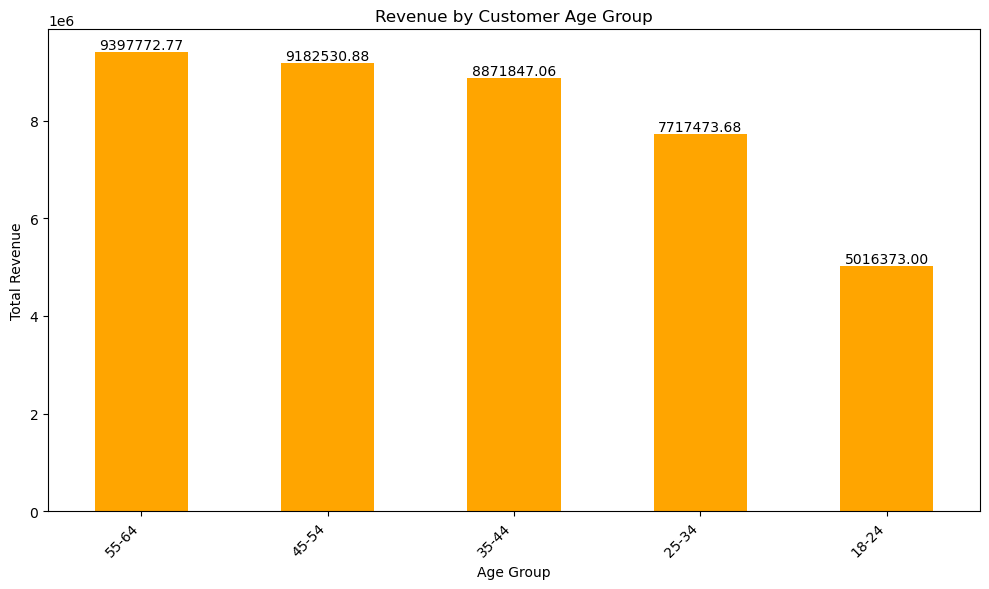

In [47]:
plt.figure(figsize=(10, 6))
age_group_revenue = df.groupby('AgeGroup')['TotalRevenue'].sum().sort_values(ascending=False)
age_group_revenue.plot(kind='bar', color='orange')
plt.title('Revenue by Customer Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')

# Adding data labels
for index, value in enumerate(age_group_revenue):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### Total Revenue by Gender

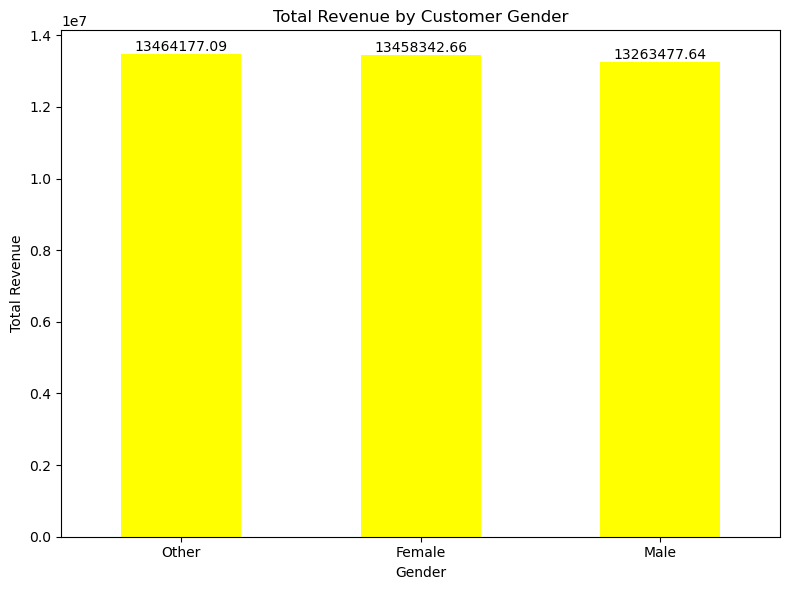

In [49]:
plt.figure(figsize=(8, 6))
gender_revenue = df.groupby('CustomerGender')['TotalRevenue'].sum().sort_values(ascending=False)
gender_revenue.plot(kind='bar', color='yellow')
plt.title('Total Revenue by Customer Gender')
plt.xlabel('Gender')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0, ha='center')

# Adding data labels
for index, value in enumerate(gender_revenue):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Sales Channel 

#### Total Revenue by Payment Method 

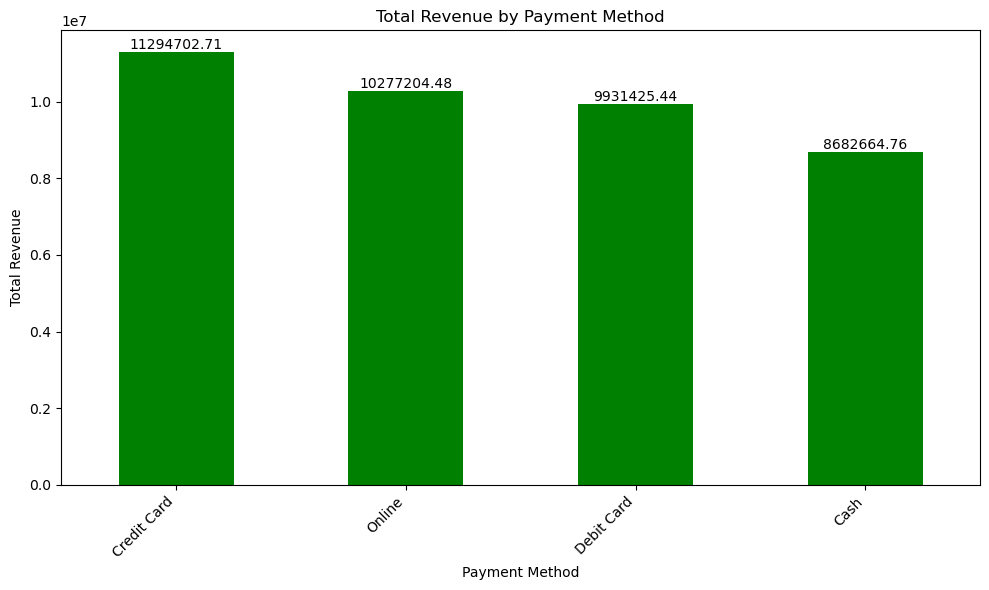

In [52]:
plt.figure(figsize=(10, 6))
payment_method_revenue = df.groupby('PaymentMethod')['TotalRevenue'].sum().sort_values(ascending=False)
payment_method_revenue.plot(kind='bar', color='green')
plt.title('Total Revenue by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')

# Adding data labels
for index, value in enumerate(payment_method_revenue):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### Revenue by Sales Channel 

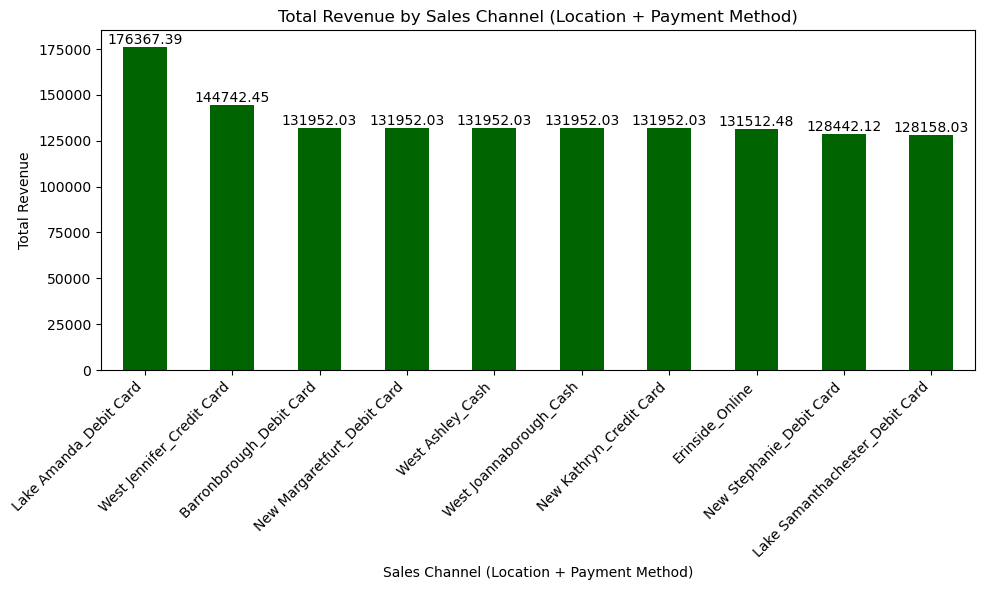

In [55]:
plt.figure(figsize=(10, 6))
location_payment_revenue = df.groupby('LocationPayment')['TotalRevenue'].sum().sort_values(ascending=False).head(10)
location_payment_revenue.plot(kind='bar', color='darkgreen')
plt.title('Total Revenue by Sales Channel (Location + Payment Method)')
plt.xlabel('Sales Channel (Location + Payment Method)')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')

# Adding data labels
for index, value in enumerate(location_payment_revenue):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Brand Performance

#### Unit sold by Brand

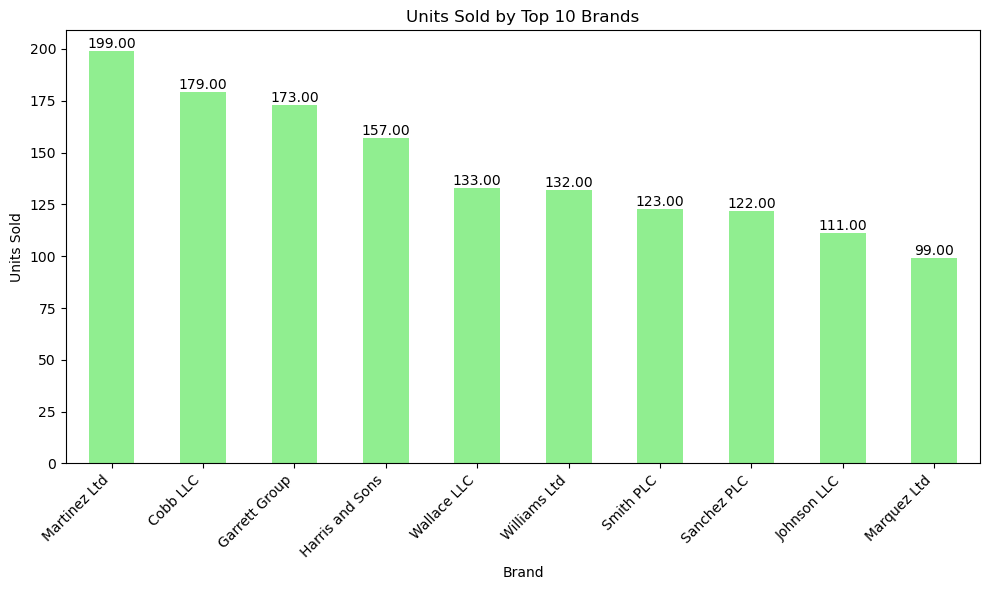

In [56]:
plt.figure(figsize=(10, 6))
brand_units_sold = df.groupby('Brand')['UnitsSold'].sum().sort_values(ascending=False).head(10)
brand_units_sold.plot(kind='bar', color='lightgreen')
plt.title('Units Sold by Top 10 Brands')
plt.xlabel('Brand')
plt.ylabel('Units Sold')
plt.xticks(rotation=45, ha='right')

# Adding data labels
for index, value in enumerate(brand_units_sold):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Key Recommendations

#### Focus on High-Performing Segments:

Allocate more resources towards the top-performing models, brands, and customer segments, particularly the 45-64 age group. This includes increasing marketing spend and inventory for high-demand products


#### Enhance City-Specific Strategies:

Given the importance of certain cities in driving revenue, tailor marketing strategies to these key urban markets. This might include localized promotions or events.

#### Optimize Sales Channels:

Strengthen the most effective sales channels and consider phasing out or restructuring less effective ones. Offer targeted incentives to encourage the use of preferred payment methods.

#### Dynamic Pricing Strategies: 


Consider implementing dynamic pricing for brands with high revenue per unit to maximize profitability. Simultaneously, explore slight price adjustments for high-volume brands to boost overall revenue without impacting sales volume.